In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def histeq(image):
    hist=np.array(image.histogram())
    x,y=image.size
    summ=0
    for i in range(256):
        summ+=hist[i]
        hist[i]=summ*255//(x*y)
    return hist

In [3]:
def apply_eq(image,hist):
    x,y=image.size
    arr_img=np.array(image).reshape(x*y)
    for i in range(len(arr_img)):
        arr_img[i]=hist[arr_img[i]]  #replace old grey levels with the equalised one
    return Image.fromarray(arr_img.reshape((y,x)))

array([[108, 110, 110, ...,  85,  85,  84],
       [107, 109, 110, ...,  85,  85,  84],
       [105, 108, 109, ...,  85,  84,  84],
       ...,
       [ 99,  97,  97, ...,  81,  82,  83],
       [100,  97,  97, ...,  86,  87,  89],
       [100,  97,  97, ...,  93,  94,  95]], dtype=uint8)

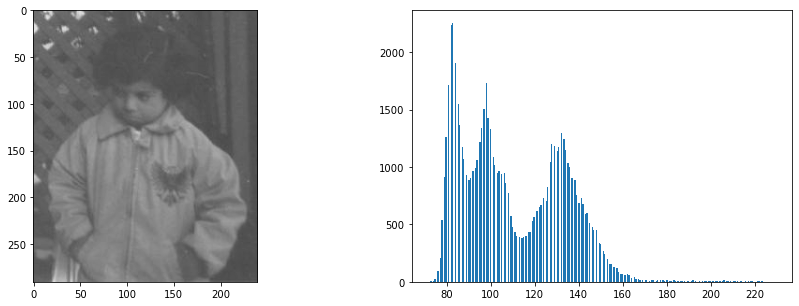

In [4]:
img=Image.open('pout.jpg').convert('L')
arr=np.array(img)
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[1].hist(arr.reshape(arr.size),bins=255)
arr

In [5]:
equal_grey_levels=histeq(img)
equal_grey_levels        # indices are old grey levels

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         3,   6,  11,  17,  25,  33,  40,  46,  51,  55,  59,  62,  66,
        69,  73,  76,  80,  84,  89,  95, 101, 106, 111, 115, 119, 122,
       126, 129, 133, 136, 139, 141, 143, 144, 146, 147, 148, 150, 151,
       153, 155, 156, 159, 161, 163, 166, 168, 171, 174, 178, 182, 186,
       191, 195, 200, 204, 208, 212, 216, 219, 222, 225, 228, 230, 233,
       235, 237, 239, 241, 242, 244, 245, 246, 247, 248, 249, 249, 250,
       250, 251, 251, 251, 252, 252, 252, 252, 253, 253, 253, 253, 253,
       253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 25

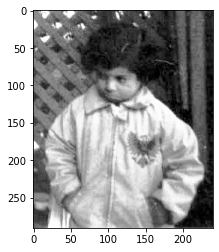

In [6]:
equal_img=apply_eq(img,equal_grey_levels)
plt.imshow(equal_img,cmap='gray',vmin=0,vmax=255)

array([[139, 143, 143, ...,  46,  46,  40],
       [136, 141, 143, ...,  46,  46,  40],
       [129, 139, 141, ...,  46,  40,  40],
       ...,
       [106,  95,  95, ...,  17,  25,  33],
       [111,  95,  95, ...,  51,  55,  62],
       [111,  95,  95, ...,  76,  80,  84]], dtype=uint8)

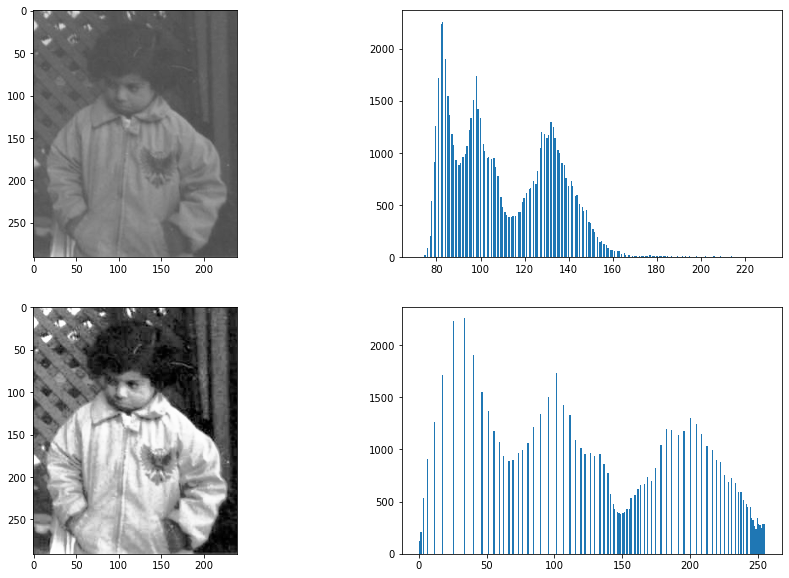

In [7]:
equal_arr=np.array(equal_img)
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0,1].hist(arr.reshape(arr.size),bins=255)
axes[1,0].imshow(equal_img,cmap='gray',vmin=0,vmax=255)
axes[1,1].hist(equal_arr.reshape(equal_arr.size),bins=255)
equal_arr